In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, normalize
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("imakash3011/customer-personality-analysis")

print("Path to dataset files:", path)
df = pd.read_csv('/kaggle/input/customer-personality-analysis/marketing_campaign.csv', sep='\t')

Path to dataset files: /kaggle/input/customer-personality-analysis


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [7]:
print('First date that a customer registered: ', df['Dt_Customer'].min())
print('Last date that a customer registered: ', df['Dt_Customer'].max())

First date that a customer registered:  2012-07-30 00:00:00
Last date that a customer registered:  2014-06-29 00:00:00


<Axes: xlabel='Marital_Status', ylabel='count'>

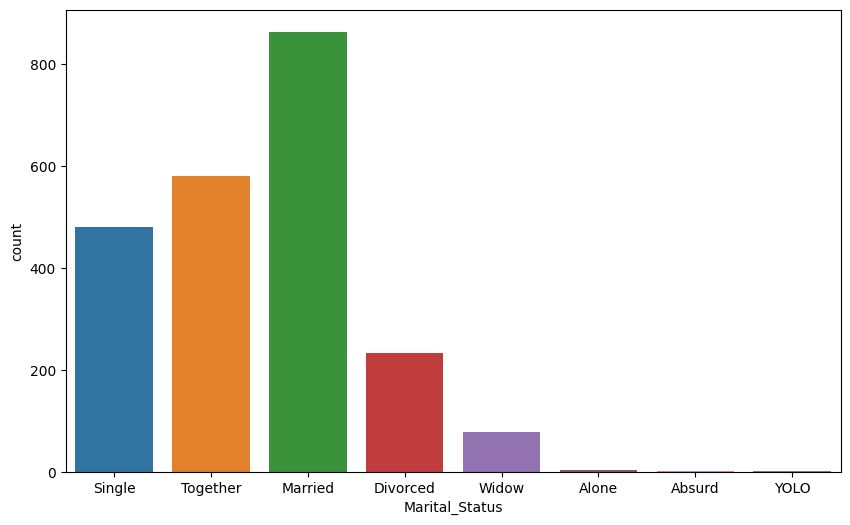

In [8]:
plt.figure(figsize=(10,6))

sns.countplot(data=df, x='Marital_Status')

<Axes: xlabel='Income', ylabel='Recency'>

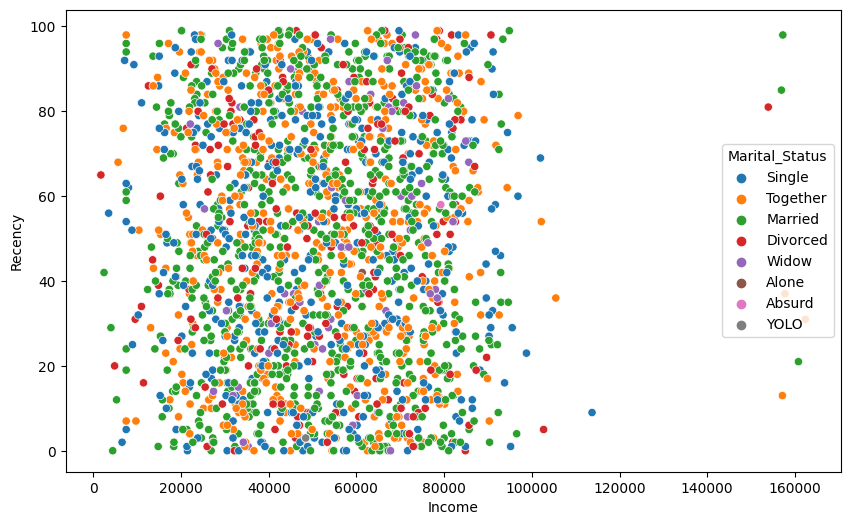

In [9]:
plt.figure(figsize=(10,6))

remove_outliers = df[(df['Year_Birth'] >= 1920) & (df['Income'] <= 200000)]
sns.scatterplot(data=remove_outliers, y='Recency', x='Income', hue='Marital_Status')

In [10]:
df['Total_Purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
df['Day_Registered'] = df['Dt_Customer'].max() - df['Dt_Customer']

In [11]:
print(df['Dt_Customer'].max() - df['Dt_Customer'].min())
print(len(df['Dt_Customer'].unique()))

699 days 00:00:00
663


In [12]:
days_test = df['Day_Registered'].dt.days - df['Recency']
print(days_test[days_test.values < 0])

45     -71
53     -32
88     -22
91     -12
94     -48
        ..
2182   -29
2187   -11
2199   -62
2223   -29
2236   -37
Length: 147, dtype: int64


In [13]:
df.loc[45]

ID                                    1371
Year_Birth                            1976
Education                       Graduation
Marital_Status                      Single
Income                             79941.0
Kidhome                                  0
Teenhome                                 0
Dt_Customer            2014-06-28 00:00:00
Recency                                 72
MntWines                               123
MntFruits                              164
MntMeatProducts                        266
MntFishProducts                        227
MntSweetProducts                        30
MntGoldProds                           174
NumDealsPurchases                        1
NumWebPurchases                          2
NumCatalogPurchases                      4
NumStorePurchases                        9
NumWebVisitsMonth                        1
AcceptedCmp3                             0
AcceptedCmp4                             0
AcceptedCmp5                             0
AcceptedCmp

In [14]:
(df['Dt_Customer'] + pd.to_timedelta(df['Recency'], unit='D')).max()

Timestamp('2014-10-04 00:00:00')

In [15]:
from datetime import datetime

base_date = datetime(2014, 10, 4)
df['Day_Registered'] = (base_date - df['Dt_Customer']).dt.days
df.loc[df['Day_Registered'] == df['Recency'], 'Day_Registered'] += 1
days_test = df['Day_Registered'] - df['Recency']

print(days_test[days_test.values < 0])

Series([], dtype: int64)


In [16]:

#Getting the purchases per day before the last Recency from the users

df['Purchases_Per_Day'] = df['Total_Purchases']/(df['Day_Registered'] - df['Recency'])
df['Purchases_Per_Month'] = df['Purchases_Per_Day']*30 # Looking in 30 days if that matches the usual pattern, FOR ME usually going to grossery store 1-4 every month

Text(0.5, 1.0, 'Pattern of Purchases per month')

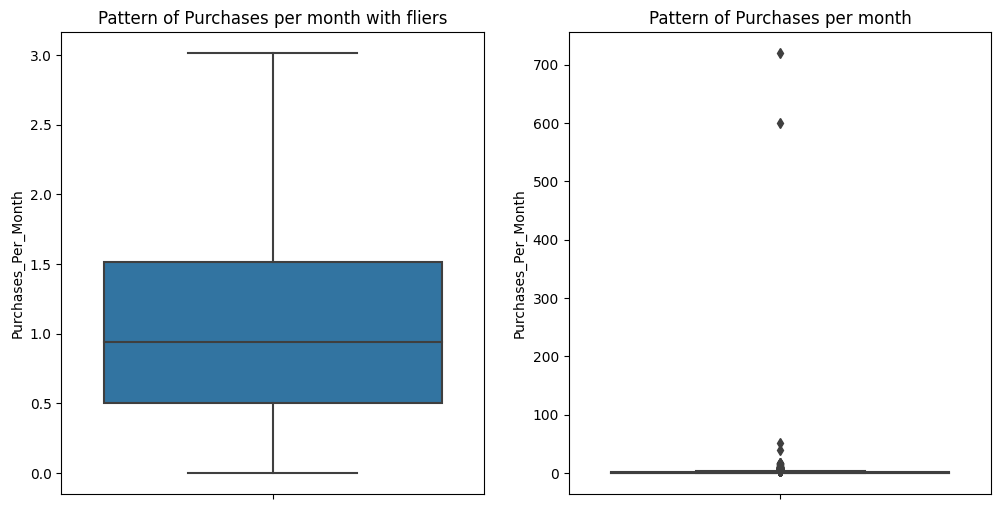

In [17]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.boxplot(data=df, y='Purchases_Per_Month', showfliers=False)
plt.title('Pattern of Purchases per month with fliers')

plt.subplot(1,2,2)
sns.boxplot(data=df, y='Purchases_Per_Month')
plt.title('Pattern of Purchases per month')

In [18]:
df[df['Purchases_Per_Month'] >= 3]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Purchases,Day_Registered,Purchases_Per_Day,Purchases_Per_Month
29,1966,1965,PhD,Married,84618.0,0,0,2013-11-22,96,684,...,0,0,0,3,11,0,25,316,0.113636,3.409091
45,1371,1976,Graduation,Single,79941.0,0,0,2014-06-28,72,123,...,0,0,0,3,11,0,15,98,0.576923,17.307692
50,8614,1957,Graduation,Widow,65486.0,0,1,2014-05-12,29,245,...,0,0,0,3,11,0,16,145,0.137931,4.137931
53,2225,1977,Graduation,Divorced,82582.0,0,0,2014-06-07,54,510,...,1,0,0,3,11,1,20,119,0.307692,9.230769
59,8375,1968,PhD,Married,55954.0,0,1,2014-03-03,63,447,...,0,0,0,3,11,0,16,215,0.105263,3.157895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,5721,1956,PhD,Married,84117.0,0,0,2014-05-11,60,611,...,0,0,0,3,11,0,23,146,0.267442,8.023256
2199,9014,1975,Graduation,Married,37085.0,1,1,2014-06-26,65,39,...,0,0,0,3,11,0,6,100,0.171429,5.142857
2217,9589,1948,PhD,Widow,82032.0,0,0,2014-04-05,54,332,...,0,0,0,3,11,0,17,182,0.132812,3.984375
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,1,0,0,3,11,0,15,116,0.250000,7.500000


<Axes: xlabel='Dt_Customer', ylabel='Purchases_Per_Month'>

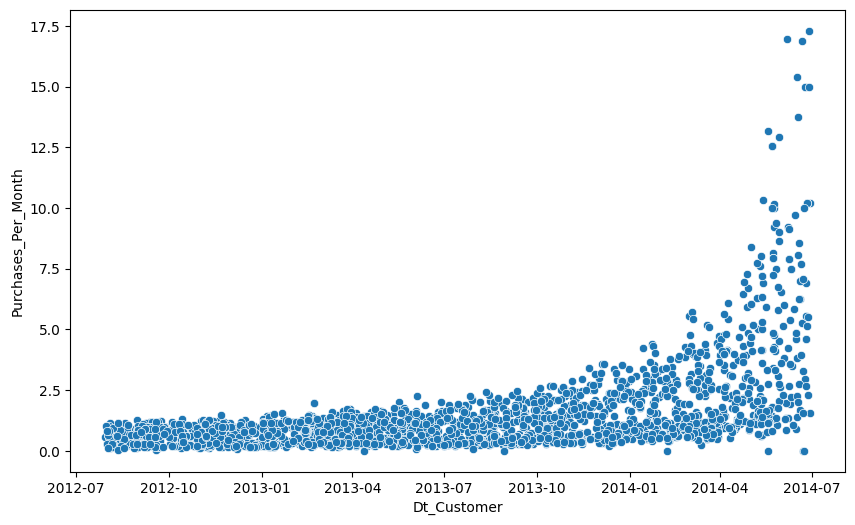

In [19]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=df[df['Purchases_Per_Month'] <=25], x='Dt_Customer', y='Purchases_Per_Month')

In [20]:
df['Total_Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['Age'] = base_date.year - df['Year_Birth']

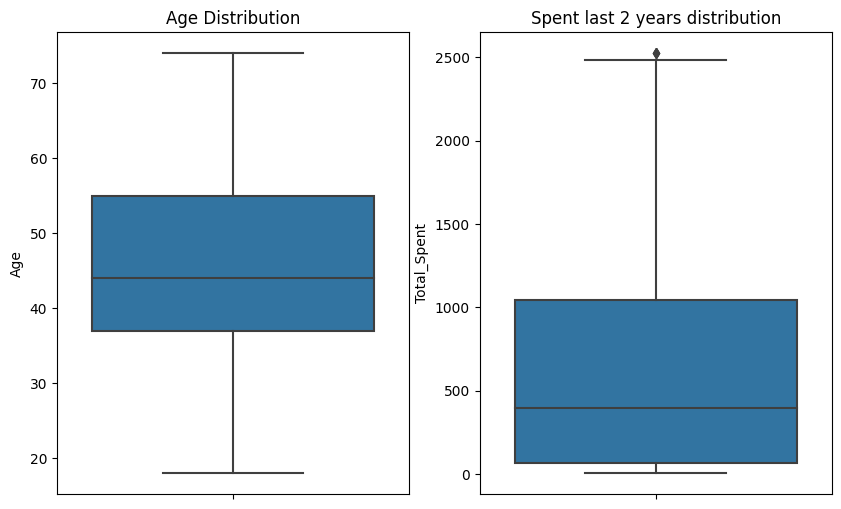

In [21]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.boxplot(data=df, y='Age', showfliers=False)
plt.title("Age Distribution")

plt.subplot(1,2,2)
sns.boxplot(data=df, y='Total_Spent')
plt.title("Spent last 2 years distribution")

plt.show()

In [22]:
scaler = StandardScaler()

df.dropna(inplace=True)
df = df[df['Income'] < 200000]
customer_quality = df[['Income', 'Total_Spent', 'Day_Registered', 'Purchases_Per_Month']]
scaled_cq = scaler.fit_transform(customer_quality)
X = normalize(scaled_cq, norm='l2')
X

array([[ 0.12534307,  0.73254723,  0.66864248, -0.024102  ],
       [-0.16834403, -0.61998844, -0.76511387, -0.04330577],
       [ 0.93448324,  0.28650144, -0.20991917, -0.02432977],
       ...,
       [ 0.15972104,  0.72110916, -0.67265186,  0.04505814],
       [ 0.60681351,  0.2955698 , -0.73757295,  0.02005017],
       [ 0.02761036, -0.47726749,  0.87654835, -0.0558247 ]])

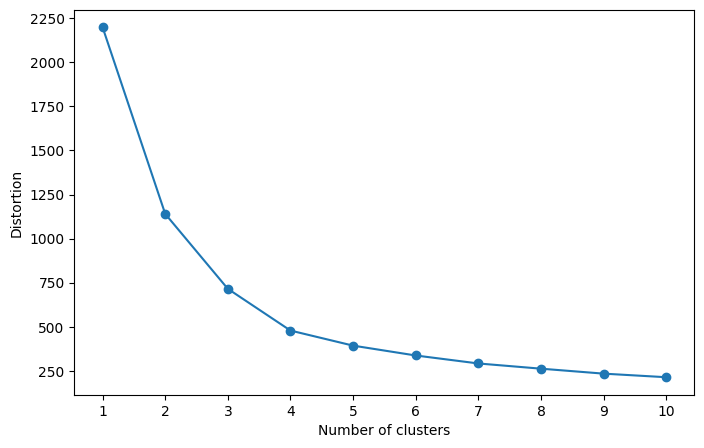

In [23]:
distortions = []

for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(X)
    distortions.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,11), distortions, marker='o')
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()


3


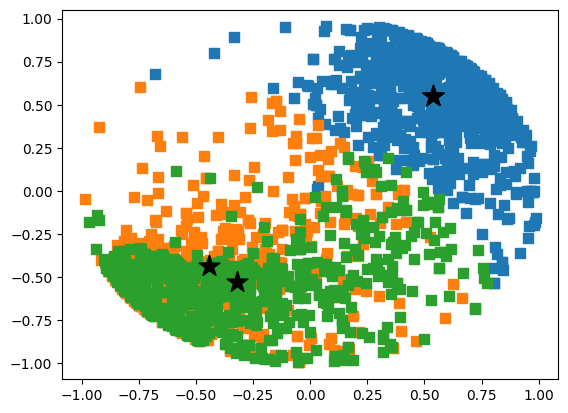

4


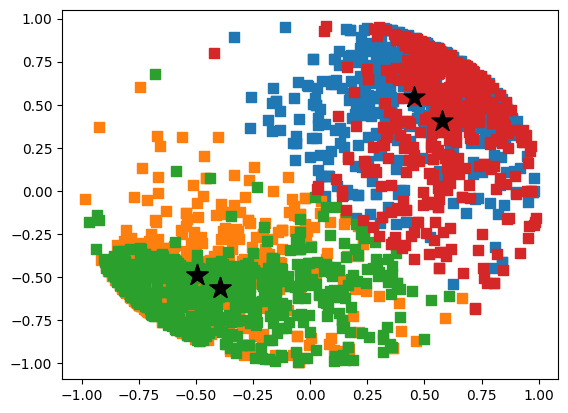

5


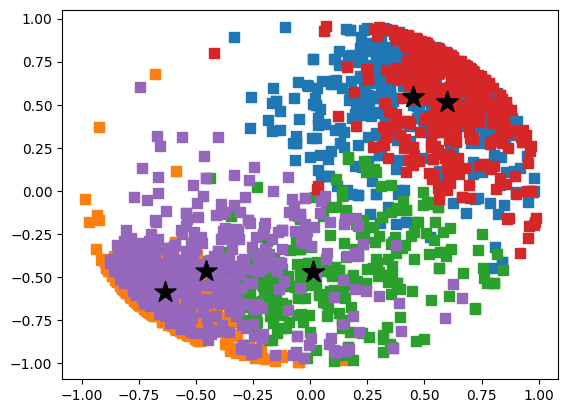

6


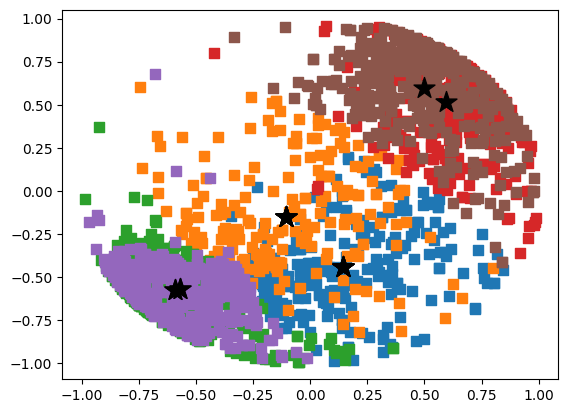

7


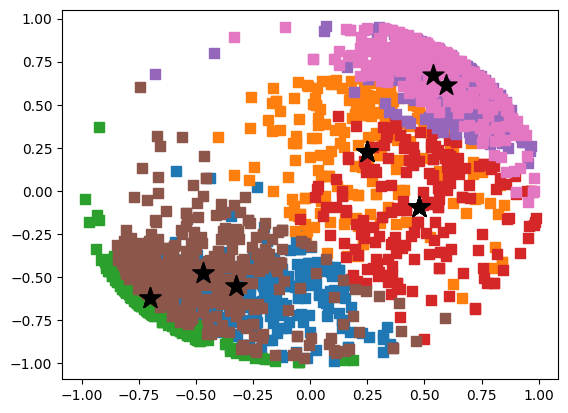

In [24]:
for i in range(3, 8):
    num_clusters = i
    km = KMeans(n_clusters=num_clusters)
    print(i)

    # Performando clusterização K-means

    cluster_km = km.fit_predict(X)

    for cluster in range(num_clusters):
        plt.scatter(X[cluster_km==cluster,0],
                    X[cluster_km==cluster,1],
                    s=50,
                    cmap='Pastel1',
                    marker='s',
                    label='cluster {}'.format(cluster))

        plt.scatter(km.cluster_centers_[:,0],
                    km.cluster_centers_[:,1],
                    s=250,
                    c='black',
                    marker='*',
                    label='centroid')
    plt.show()

Number of clusters: 3


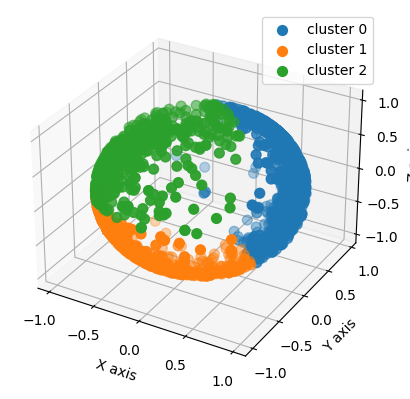

Number of clusters: 4


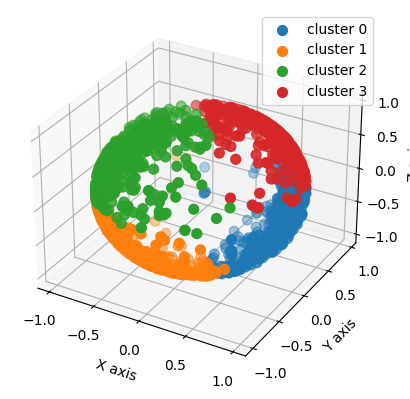

Number of clusters: 5


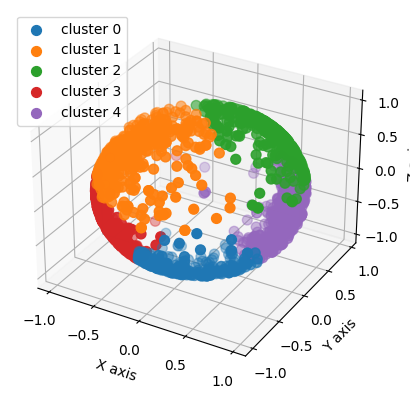

Number of clusters: 6


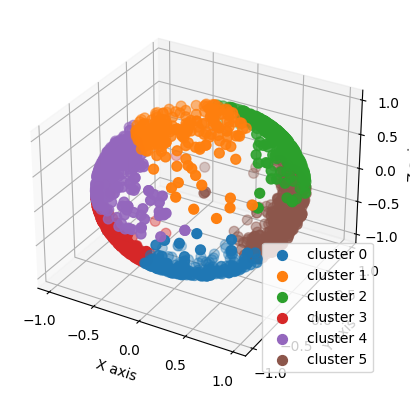

Number of clusters: 7


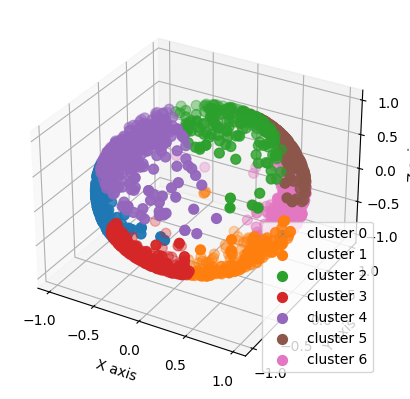

In [25]:
for i in range(3, 8):
    num_clusters = i
    km = KMeans(n_clusters=num_clusters)
    print(f"Number of clusters: {i}")

    # Perform K-means clustering
    cluster_km = km.fit_predict(X)

    # Create a new figure for each number of clusters
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for cluster in range(num_clusters):
        # Scatter plot for each cluster in 3D
        ax.scatter(X[cluster_km == cluster, 0],
                   X[cluster_km == cluster, 1],
                   X[cluster_km == cluster, 2],
                   s=50,
                   cmap='Pastel1',
                   marker='o',

                   label=f'cluster {cluster}')

    # Set labels for each axis
    ax.set_xlabel("X axis")
    ax.set_ylabel("Y axis")
    ax.set_zlabel("Z axis")
    ax.legend()
    plt.show()

In [26]:
# Set the number of clusters to 5
num_clusters = 4
km = KMeans(n_clusters=num_clusters)
print(f"Number of clusters: {num_clusters}")

cluster_km = km.fit_predict(X)

customer_quality['Cluster'] = cluster_km

fig = go.Figure()

for cluster in range(num_clusters):
    fig.add_trace(go.Scatter3d(
        x=customer_quality[customer_quality['Cluster'] == cluster].iloc[:, 0],
        y=customer_quality[customer_quality['Cluster'] == cluster].iloc[:, 1],
        z=customer_quality[customer_quality['Cluster'] == cluster].iloc[:, 2],
        mode='markers',
        marker=dict(size=5),
        name=f'Cluster {cluster}'
    ))

fig.update_layout(
    title='3D K-Means Clustering with 4 Clusters',
    scene=dict(
        xaxis_title='X Axis',
        yaxis_title='Y Axis',
        zaxis_title='Z Axis'
    )
)

# Show the plot
fig.show()


Number of clusters: 4


In [27]:
for i in range(4):
    print('\nCluster: ', i)
    print('\n', customer_quality[customer_quality['Cluster'] == i].describe())


Cluster:  0

               Income  Total_Spent  Day_Registered  Purchases_Per_Month  \
count     531.000000   531.000000      531.000000           531.000000   
mean    69467.205273  1246.058380      631.158192             1.059732   
std     12013.369762   440.599406      100.439813             0.298063   
min     44802.000000   401.000000      414.000000             0.444811   
25%     60701.500000   908.000000      547.000000             0.845384   
50%     68655.000000  1191.000000      631.000000             1.041009   
75%     77818.000000  1549.500000      721.000000             1.217804   
max    160803.000000  2524.000000      795.000000             2.258065   

       Cluster  
count    531.0  
mean       0.0  
std        0.0  
min        0.0  
25%        0.0  
50%        0.0  
75%        0.0  
max        0.0  

Cluster:  1

              Income  Total_Spent  Day_Registered  Purchases_Per_Month  Cluster
count    647.000000   647.000000      647.000000           647.000000  